<a href="https://colab.research.google.com/github/sergioaugusto94/Classificador_Paginas_Conteudo/blob/main/ML_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('train.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.drop('Id', axis = 1, inplace = True)

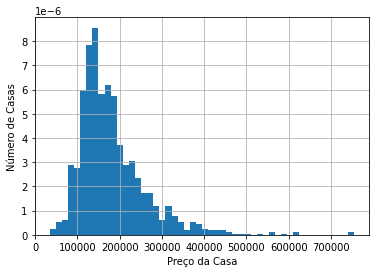

In [6]:
data['SalePrice'].hist(bins = 50, density = True)
plt.ylabel('Número de Casas')
plt.xlabel('Preço da Casa')
plt.show()


Fazemos uma transformação logaritmica nos preços das casas e observamos que após a transformação, a distribuição dos preços das casas ficou mais parecida com uma curva Gaussiana, que na maioria dos casos ajuda a melhorar a performance do algoritmo desenvolvido.

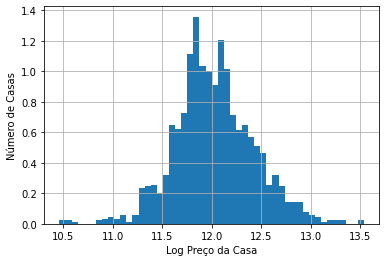

In [7]:
np.log(data['SalePrice']).hist(bins = 50, density = True)
plt.ylabel('Número de Casas')
plt.xlabel('Log Preço da Casa')
plt.show()

Armazenando as colunas que possuem valores categóricos. 

In [8]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

cat_vars = cat_vars + ['MSSubClass']

Armazenando as colunas que possuem variáveis numéricas e que não seja o rótulo do problema (O preço das casas).

In [9]:
num_vars = [var for var in data.columns 
            if var not in cat_vars and var != 'SalePrice']

Verificando as colunas que possuem registros nulos.

In [10]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

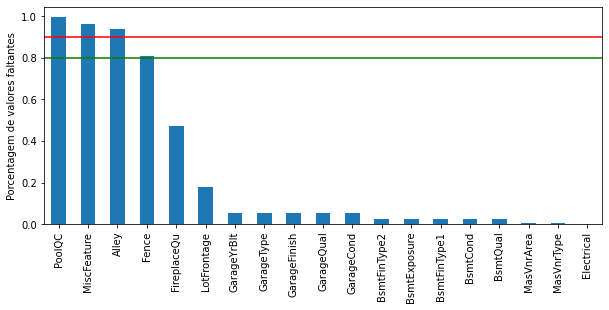

In [11]:
data[vars_with_na].isnull().mean().sort_values(ascending = False).plot.bar(figsize = (10, 4))
plt.ylabel('Porcentagem de valores faltantes')
plt.axhline(y = 0.90, color = 'r', linestyle = '-')
plt.axhline(y = 0.80, color = 'g', linestyle = '-')

Vamos contar o número de colunas que possuem dados faltantes de cada um dos tipos, Colunas categóricas e Colunas numéricas. 

In [12]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Número de colunas categóricas com registros nulos: ', len(cat_na))
print('Número de colunas numéricas com registros nulos: ', len(num_na))


Número de colunas categóricas com registros nulos:  16
Número de colunas numéricas com registros nulos:  3


A função abaixo tem o objetivo de comparar o valor médio e o desvio padrão do valor das casas das colunas com valores ausentes. 

In [14]:
def na_value_analise(df, var):

  #Copiamos o df para que qualquer modificação realizada dentro da 
  #função não seja aplicada no df original. 
  df = df.copy()

  #No df, vamos substituir os registros de uma coluna caso por 1, caso 
  #o valor esteja ausente ou por 0, caso contenha um valor. 
  df[var] = np.where(df[var].isnull(), 1, 0)

  tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

  tmp.plot(kind = 'barh', y = 'mean', legend = False, xerr = 'std', 
           title = 'Valor da Casa', color = 'green')
  plt.show()

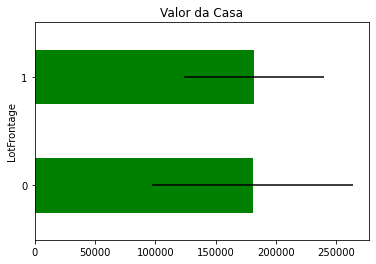

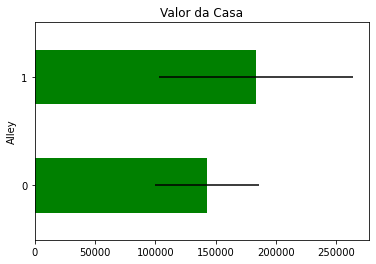

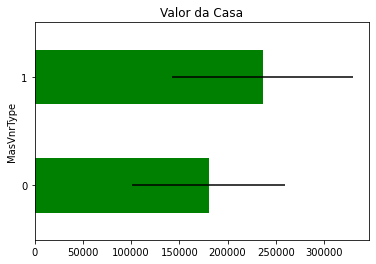

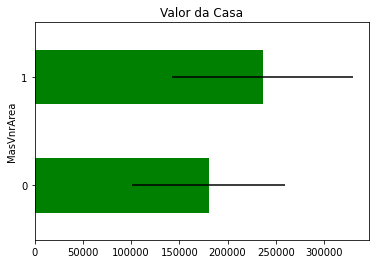

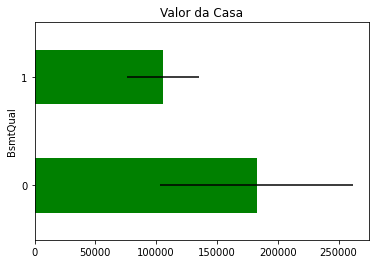

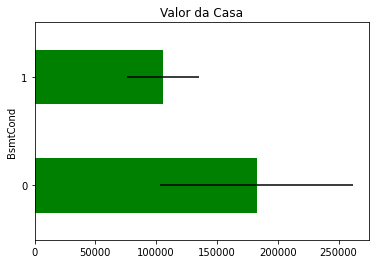

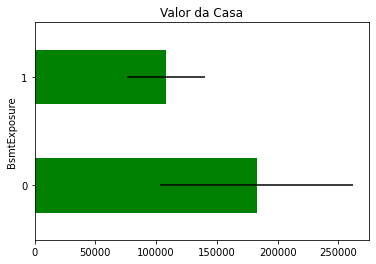

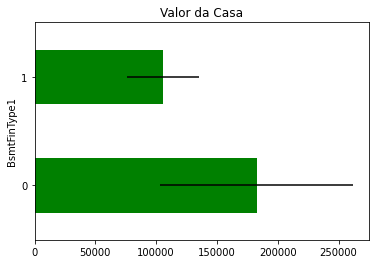

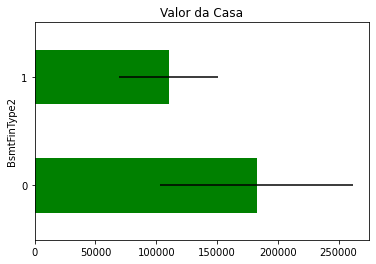

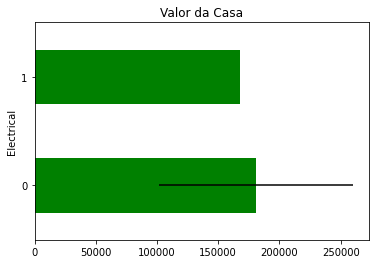

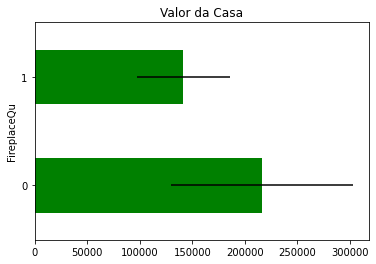

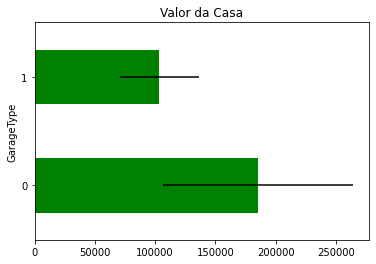

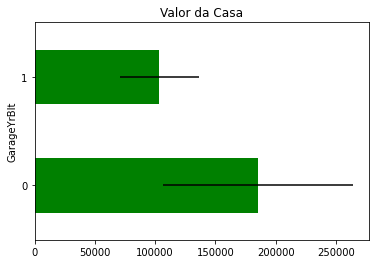

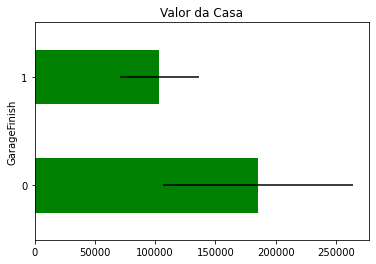

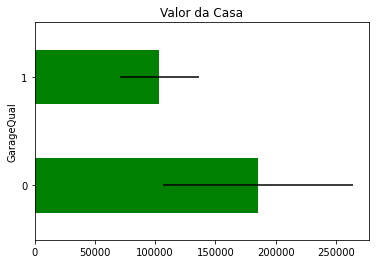

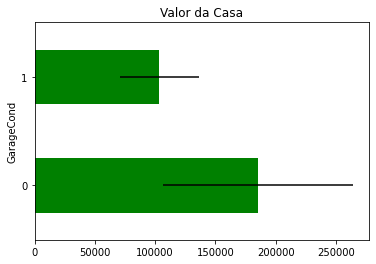

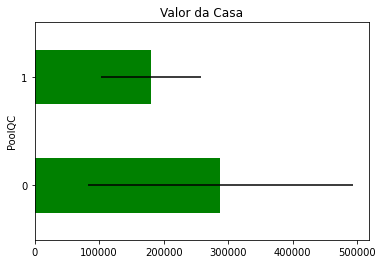

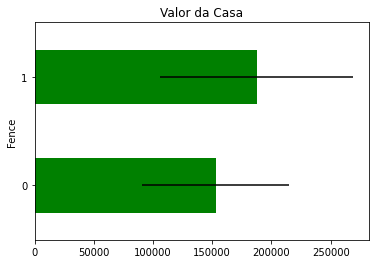

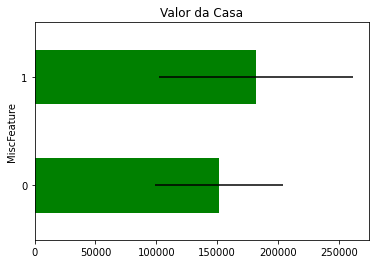

In [15]:
for var in vars_with_na:
  na_value_analise(data, var)